## This code was ran using the October data provided by Shu combined with the block data I aquired for Tien. It was done this way because the node went bad in the middle of the project

In [1]:
import numpy as np
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import pandas as pd
from pre_and_post_valuations_data import transaction_data_file, block_data_file, pre_geth_file, \
    geth_reccomendation_file, suite_spot_txn, suite_spot_blx, post_eip_oct_txn_file, \
    october_block_data



#Read in the data, use your own machines specific path as you see fit
transaction_data_d1=pd.read_csv(transaction_data_file)
block_data_d1=pd.read_csv(block_data_file)
pre_geth=pd.read_csv(pre_geth_file)
geth_r=pd.read_csv(geth_reccomendation_file)
suite_txn=pd.read_csv(suite_spot_txn)
suite_blx=pd.read_csv(suite_spot_blx)
post_eip_oct_txn=pd.read_csv(post_eip_oct_txn_file)
post_eip_oct_blx=pd.read_csv(october_block_data)

def random_index_generator(my_list,num_of_indexes):
    my_max=len(my_list)-1
    result=np.random.uniform(0,my_max,num_of_indexes)
    index=[round(x) for x in result]
    return [my_list[x] for x in index]

def outlier_trimmer(p_up,p_lo,my_list):
    my_up=np.percentile(my_list,p_up)
    my_lo=np.percentile(my_list,p_lo)
    return [x for x in my_list if (x < my_up)&(x > my_lo)]

#converts units to gwei
def gwei_fixer(my_list):
    return [x/1000000000 for x in my_list]

display(post_eip_oct_txn)

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0xb2170227512a5b12f3047de337623d43ad6df2d09ddd...,329584,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,0,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,0xb44fb34b7750d4cd60999fb62672f4f62f03786c,1295000000000000000,90000,198000000000,0x,1633451105,NaN,NaN,0
1,0x84a4c464bcb1ddb3140e6f102e94b4aaebe780071d78...,1580159,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,1,0xa1d8d972560c2f8144af871db508f0b0b10a3fbf,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,0,102210,198000000000,0xa9059cbb000000000000000000000000e4ccb6650cfc...,1633451105,NaN,NaN,0
2,0xfd0eb3eb2b55518fffa05a4343951929f25d3b6fb2c3...,12,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,2,0x93801922d71afe56fc96db55042a5bb00c1ad3e9,0x0392b64b8bfda184f0a72ce37d73dc7df978c4f7,14524892325506000,21000,187862270214,0x,1633451105,NaN,NaN,0
3,0x6d6ffa72fbb07f5f42fa3b1d28180be475ea8e8f5c74...,4,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,3,0xb79ec3f3dc97e4ec91f7fc0019847ca50c67e27f,0x0392b64b8bfda184f0a72ce37d73dc7df978c4f7,5854892325506000,21000,187862270214,0x,1633451105,NaN,NaN,0
4,0x11e5a4d21139c7a0de556f791ebc0f10c273cec96efc...,270208,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,4,0x5ab9d116a53ef41063e3eae26a7ebe736720e9ba,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,250000,185000000000,0x38ed1739000000000000000000000000000000000000...,1633451105,1.850000e+11,7.000000e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965767,0xa19c18908c5192c2fcfcd01cf4bcc77b79abba35c19a...,0,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,265,0x2ebaeab9049854e691304013578d7d37f33e34dc,0x6dfc34609a05bc22319fa4cce1d1e2929548c0d7,12683260000000000,21000,100660000000,0x,1633518046,NaN,NaN,0
965768,0xfb72b3c3a2bdb9a7291804aa9d01846ec030be5734a6...,0,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,266,0x27967e5d8bf49c2378e831cc6d6134cf9c9dde2c,0x6dfc34609a05bc22319fa4cce1d1e2929548c0d7,23274210000000000,21000,100660000000,0x,1633518046,NaN,NaN,0
965769,0xfb608435b14860a8a7cc52f648d58bd32d58515f376b...,484,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,267,0x88004a0f6e7dfc2ef21c49b614eb0a3569e29525,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,287000000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2
965770,0xa6e0986b89ca14e87572ca5ae467473221e2ed4a04d2...,312,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,268,0x88aa631b427cf96d12d91885e7026a3636d90070,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,789250000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2


In [2]:
#get rid of nulls in the dataframe
post_eip_oct_txn=\
post_eip_oct_txn[pd.notnull(post_eip_oct_txn.max_priority_fee_per_gas)]

#isolate min and max block numbers
max_block=np.max(post_eip_oct_txn.block_number)
min_block=np.min(post_eip_oct_txn.block_number)


#display transactions and blocks
display(post_eip_oct_txn)
display(post_eip_oct_blx)

#subset the block data to only the blocks in our transaction data
post_eip_oct_blx=post_eip_oct_blx[post_eip_oct_blx.number < max_block ]
post_eip_oct_blx=post_eip_oct_blx[post_eip_oct_blx.number > min_block ]

#display final block dataframe
display(post_eip_oct_blx)

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
4,0x11e5a4d21139c7a0de556f791ebc0f10c273cec96efc...,270208,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,4,0x5ab9d116a53ef41063e3eae26a7ebe736720e9ba,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0,250000,185000000000,0x38ed1739000000000000000000000000000000000000...,1633451105,1.850000e+11,7.000000e+10,2
5,0xaeefeffd8eab02be8ffa5b1e3f8acf83855ac4a3567f...,55,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,5,0x204a731a626438a0b2a657378668cfbfe70a90f5,0x96f47d56f25d2ba629db1f55db0517dee67640e1,0,119876,181726253573,0x6a76120200000000000000000000000001fdc62ff435...,1633451105,1.817263e+11,7.733000e+10,2
6,0x568fd3a753000ce8b00651daaff922533afc06e7e355...,2760623,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,6,0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511,0x1e852c5bbe4c7cda0ccac3c4561db6cc9bc39eb9,59104921050000000000,21000,162831880856,0x,1633451105,2.820000e+11,4.000000e+09,2
7,0x06190ba28039040ac4d79daff31a32f958937414d474...,3042959,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,7,0x3cd751e6b0078be393132286c442345e5dc49699,0xac4c7b2c36f4beed0963eef8215b2fa9bc9be15d,29210120000000000,21000,162831880856,0x,1633451105,2.820000e+11,4.000000e+09,2
8,0x07796eaca8cbf3b748305cf26214c99ffe5d043157a2...,3042960,0x12b63c589dcd362d45c65b58d6a6fa72226d60832b00...,13360100,8,0x3cd751e6b0078be393132286c442345e5dc49699,0xdac17f958d2ee523a2206206994597c13d831ec7,0,250000,162831880856,0xa9059cbb000000000000000000000000ae31986171da...,1633451105,2.820000e+11,4.000000e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965764,0x0762560fa72fdb7b92a905b260581b017a8c9ce22d11...,113,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,262,0x41c8730c4a8a07d523e25f80c9b477337e16fa9c,0xa4dc59bae0ca1a0e52dac1885199a2fb53b3abe3,0,45000,100976098829,0x3e12170f000000000000000000000000d8aa5ed74e5a...,1633518046,1.089530e+11,1.410000e+09,2
965766,0x027bab6777af58610e94f4a5d8bafae9d923646bda11...,425,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,264,0x26b3eea1cd34a4aff7ce828a5f71daac042d38e0,0x6ad567e7d23787cbc025f168a102fb394e5a85b0,271499366019297752,21000,100712231644,0x,1633518046,1.915743e+11,1.146133e+09,2
965769,0xfb608435b14860a8a7cc52f648d58bd32d58515f376b...,484,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,267,0x88004a0f6e7dfc2ef21c49b614eb0a3569e29525,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,287000000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2
965770,0xa6e0986b89ca14e87572ca5ae467473221e2ed4a04d2...,312,0xa8146ae6525c1090e1d15931cc5dcb461d1e8b8c0d27...,13364999,268,0x88aa631b427cf96d12d91885e7026a3636d90070,0x9757f2d2b135150bbeb65308d4a91804107cd8d6,789250000000000000,327208,100654122220,0xe99a3f80000000000000000000000000000000000000...,1633518046,1.006541e+11,1.006541e+11,2


,number,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,13340130,30117238,12291790,1633181352,128,46881572638
1,13340131,30146648,29989476,1633181363,293,45804836329
2,13340132,30117209,7144499,1633181391,66,51470739060
3,13340133,30087799,30071371,1633181395,383,48089409412
4,13340134,30117180,17511459,1633181436,142,54094021758
...,...,...,...,...,...,...
169976,13509925,30056703,27504936,1635480560,663,144885233991
169977,13509926,30027352,4148809,1635480571,63,159920756992
169978,13509927,30056674,13838680,1635480573,226,145454631614
169979,13509928,30086025,4845441,1635480584,80,144015341287


,number,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
19900,13360130,29999944,26093891,1633451493,337,134162209076
19901,13360131,30000000,4127777,1633451508,54,146565437898
19902,13360132,30029295,7522143,1633451509,98,133286336858
19903,13360133,30058619,23324929,1633451514,341,124972385055
19904,13360134,30087972,2292007,1633451533,31,133594899045
...,...,...,...,...,...,...
25095,13364925,30029238,29667248,1633517122,399,117700237823
25096,13364926,30000000,7243497,1633517155,96,132058060672
25097,13364927,30029295,1875831,1633517165,23,123522154474
25098,13364928,30000000,6941025,1633517168,109,110010890610


In [3]:
#gwt blocks in list form and initialize list to contain average 
#gas price
my_blocks=list(post_eip_oct_blx.number)
avg_gas_price=[]

#aquire the average gas price
for i in my_blocks:
    current_itteration=post_eip_oct_txn[post_eip_oct_txn.block_number == i]
    avg_gas_price.append(np.mean(current_itteration.gas_price))
    
#insert average gas price back into the dataframe and 
#display the results
post_eip_oct_blx['avg_gas_price']=avg_gas_price
display(post_eip_oct_blx)

,number,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,avg_gas_price
19900,13360130,29999944,26093891,1633451493,337,134162209076,1.377075e+11
19901,13360131,30000000,4127777,1633451508,54,146565437898,1.514650e+11
19902,13360132,30029295,7522143,1633451509,98,133286336858,1.370622e+11
19903,13360133,30058619,23324929,1633451514,341,124972385055,1.291899e+11
19904,13360134,30087972,2292007,1633451533,31,133594899045,1.353449e+11
...,...,...,...,...,...,...,...
25095,13364925,30029238,29667248,1633517122,399,117700237823,1.259941e+11
25096,13364926,30000000,7243497,1633517155,96,132058060672,1.368194e+11
25097,13364927,30029295,1875831,1633517165,23,123522154474,1.263407e+11
25098,13364928,30000000,6941025,1633517168,109,110010890610,1.205361e+11


## now to isolate a spike...

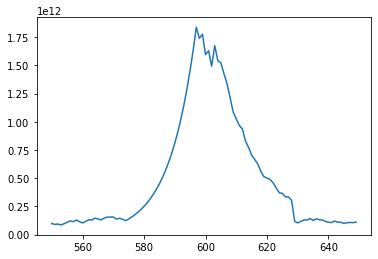

In [4]:
#get base fee and x axis
my_base_fee=list(post_eip_oct_blx.base_fee_per_gas)
my_x=list(range(0,len(my_base_fee)))


#create the plotting objects
fig = plt.figure()
ax = plt.axes()

#display first appearing spike in data
plt.plot(my_x[550:650],my_base_fee[550:650])

The results of this code tell us that:


Spike data


After spike
1500-2000
(13361600-13362100)


Durring spike
550-650
(13360650-13360750)

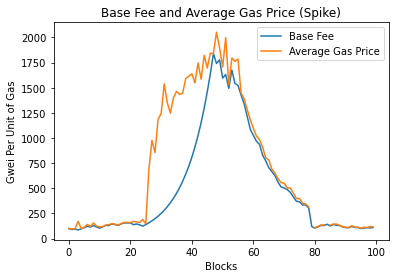

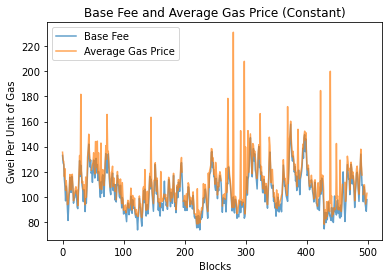

In [5]:
#display(post_eip_oct_blx)


#get average gas price and base fee of both spike and constant
#demand time periods
avg_gas_spike=list(post_eip_oct_blx.avg_gas_price)[550:650]
base_fee_spike=list(post_eip_oct_blx.base_fee_per_gas)[550:650]
avg_gas_no_spike=list(post_eip_oct_blx.avg_gas_price)[1500:2000]
base_fee_no_spike=list(post_eip_oct_blx.base_fee_per_gas)[1500:2000]





#create the plotting objects
fig = plt.figure()
ax = plt.axes()

#rescale
base_fee_spike=gwei_fixer(base_fee_spike)
avg_gas_spike=gwei_fixer(avg_gas_spike)
avg_gas_no_spike=gwei_fixer(avg_gas_no_spike)
base_fee_no_spike=gwei_fixer(base_fee_no_spike)


#plot the figure
plt.plot(range(0,len(base_fee_spike)),base_fee_spike,label='Base Fee')
plt.plot(range(0,len(base_fee_spike)),avg_gas_spike,label='Average Gas Price')
ax.set_title('Base Fee and Average Gas Price (Spike)')
ax.set_xlabel('Blocks')
ax.set_ylabel('Gwei Per Unit of Gas')
ax.legend()
plt.savefig('base_fee_v_gas_spike')


#create secondary plotting figures
fig2 = plt.figure()
ax2 = plt.axes()

#plot the graph
plt.plot(range(0,len(base_fee_no_spike)),base_fee_no_spike,alpha=0.7,\
        label='Base Fee')
plt.plot(range(0,len(base_fee_no_spike)),avg_gas_no_spike,alpha=0.7,\
        label='Average Gas Price')
ax2.set_xlabel('Blocks')
ax2.set_ylabel('Gwei Per Unit of Gas')
ax2.set_title('Base Fee and Average Gas Price (Constant)')
ax2.legend(loc='upper left')
plt.savefig('base_fee_v_gas_constant')


## Now to get block Oscilations for the time period of constant demand

In this time period we see that the blocks of interest are the 1500-2000th blocks in our dataset

,number,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,avg_gas_price
19900,13360130,29999944,26093891,1633451493,337,134162209076,1.377075e+11
19901,13360131,30000000,4127777,1633451508,54,146565437898,1.514650e+11
19902,13360132,30029295,7522143,1633451509,98,133286336858,1.370622e+11
19903,13360133,30058619,23324929,1633451514,341,124972385055,1.291899e+11
19904,13360134,30087972,2292007,1633451533,31,133594899045,1.353449e+11
...,...,...,...,...,...,...,...
25095,13364925,30029238,29667248,1633517122,399,117700237823,1.259941e+11
25096,13364926,30000000,7243497,1633517155,96,132058060672,1.368194e+11
25097,13364927,30029295,1875831,1633517165,23,123522154474,1.263407e+11
25098,13364928,30000000,6941025,1633517168,109,110010890610,1.205361e+11


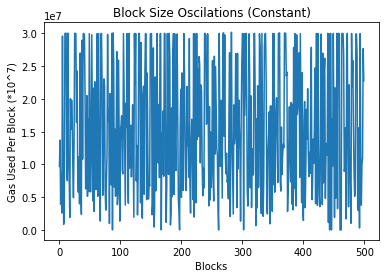

In [6]:
display(post_eip_oct_blx)


##get gas used in constant time period
constant_gas_used=list(post_eip_oct_blx.gas_used)[1500:2000]


#create the plotting objects
fig = plt.figure()
ax = plt.axes()


#plot the block oscilations
plt.plot(range(0,len(constant_gas_used)),constant_gas_used)
ax.set_title('Block Size Oscilations (Constant)')
ax.set_ylabel('Gas Used Per Block (*10^7)')
ax.set_xlabel('Blocks');
plt.savefig('block_size_oscilations')

In [7]:
#perform a series of data manupulation to get the average miner revenue and 
#average txn fee for each of the blocks and get it in the formof ETH
post_eip_oct_blx['avg_gas_used']=post_eip_oct_blx['gas_used']/\
post_eip_oct_blx['transaction_count']
post_eip_oct_blx['base_fee_gwei']=post_eip_oct_blx['base_fee_per_gas']*(10**(-18))
post_eip_oct_blx['avg_gas_price_gwei']=post_eip_oct_blx['avg_gas_price']*(10**(-18))
post_eip_oct_blx['avg_txn_fee']=post_eip_oct_blx['base_fee_gwei']\
*post_eip_oct_blx['avg_gas_used']
post_eip_oct_blx['avg_miner_revenue']=(post_eip_oct_blx['avg_gas_price_gwei']-\
post_eip_oct_blx['base_fee_gwei'])*post_eip_oct_blx['avg_gas_used']

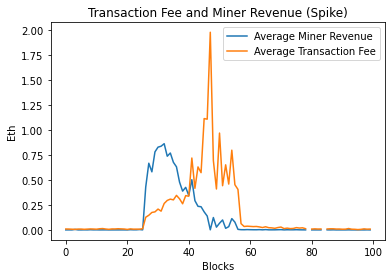

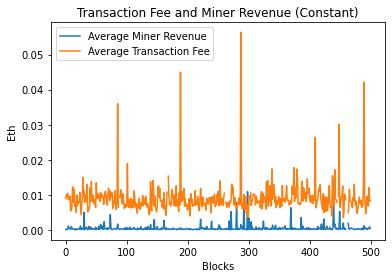

In [8]:

#After spike
#1500-2000
#(13361600-13362100)->block numbers


#Durring spike
#550-650
#(13360650-13360750)->block numbers



#plot for spike
miner_rev_spike=list(post_eip_oct_blx.avg_miner_revenue)[550:650]
txn_fee_spike=list(post_eip_oct_blx.avg_txn_fee)[550:650]


fig = plt.figure()
ax = plt.axes()

plt.plot(range(0,len(miner_rev_spike)),miner_rev_spike,label='Average Miner Revenue')
plt.plot(range(0,len(txn_fee_spike)),txn_fee_spike,label='Average Transaction Fee')
ax.set_xlabel('Blocks')
ax.set_ylabel('Eth')
ax.set_title('Transaction Fee and Miner Revenue (Spike)')
ax.legend()
plt.savefig('txn_fee_miner_rev_spike')


#plot for constant
miner_rev_constant=list(post_eip_oct_blx.avg_miner_revenue)[1500:2000]
txn_fee_constant=list(post_eip_oct_blx.avg_txn_fee)[1500:2000]

fig2 = plt.figure()
ax2 = plt.axes()



plt.plot(range(0,len(miner_rev_constant)),miner_rev_constant,\
         label='Average Miner Revenue')
plt.plot(range(0,len(txn_fee_constant)),txn_fee_constant,\
         label='Average Transaction Fee')
ax2.set_xlabel('Blocks')
ax2.set_ylabel('Eth')
ax2.set_title('Transaction Fee and Miner Revenue (Constant)')
ax2.legend()
plt.savefig('txn_fee_miner_rev_constant');